In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install astroNN


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 37.1 MB/s eta 0:00:00


In [3]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2


In [4]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [5]:
images, labels = galaxy10.load_data()
labels = to_categorical(labels)

Galaxy10_DECals.h5: 100%|█████████▉| 2.73G/2.74G [02:39<00:00, 17.2MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10_DECals.h5


Galaxy10_DECals.h5: 2.74GB [02:50, 16.1MB/s]                            


In [6]:
images.shape

(17736, 256, 256, 3)

In [7]:
resized_images = []
for image in images:
    resized_image = cv2.resize(image, (224, 224))  # Resize each image to 128x128
    resized_images.append(resized_image)

# Convert to NumPy array if needed
resized_images = np.array(resized_images)

In [8]:
images = resized_images
images.shape

(17736, 224, 224, 3)

In [9]:
num_images_to_keep = 5000
selected_images = images[:num_images_to_keep]
selected_labels = labels[:num_images_to_keep]

# Verify the shape of the new arrays
print(selected_images.shape)

(5000, 224, 224, 3)


In [10]:
images[0].shape

(224, 224, 3)

In [11]:
img = images[0]
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [12]:
x = preprocess_input(reshaped_img)

In [13]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 18s 0us/step


In [14]:
def extract_features(file, model):

    img = load_img(file, target_size=(224,224))
    img = np.array(img)
    reshaped_img = img.reshape(1,224,224,3)
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [21]:
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import array_to_img

# Your code here


# Your code here

features_path = "/content/drive/MyDrive/galaxy_features.pkl"

features_dict = {}
images[0].shape
# Loop through each image in the dataset
for i, image_array in enumerate(images):
    # Resize the image to (224, 224)
    # image_array.shape
    # img_array_resized = resize(image_array, (224, 224, 3), mode='constant', anti_aliasing=True)

    # Define the path for the current image
    file_path = f"/content/drive/MyDrive/Galaxy_images/{i}.png"  # Update the path as per your file naming conventions

    print("Processing image:", file_path)
    img = array_to_img(image_array)
    img.save(file_path)

    # Extract features for the current image
    features = extract_features(file_path, model)

    # Store features in the dictionary with the filename as the key
    features_dict[file_path] = features

# Save the dictionary as a pickle file
with open(features_path, 'wb') as file:
    pickle.dump(features_dict, file)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 1s 512ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2535.png
1/1 [==============================] - 1s 532ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2536.png
1/1 [==============================] - 1s 869ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2537.png
1/1 [==============================] - 1s 544ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2538.png
1/1 [==============================] - 1s 524ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2539.png
1/1 [==============================] - 1s 504ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2540.png
1/1 [==============================] - 1s 529ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2541.png
1/1 [==============================] - 1s 509ms/step
Processing image: /content/drive/MyDrive/Galaxy_images/2542.png
1/1 [========

KeyboardInterrupt: 

In [22]:
filenames = np.array(list(features_dict.keys()))

In [23]:
feat = np.array(list(features_dict.values()))
feat.shape

(5034, 1, 4096)

In [24]:
feat = feat.reshape(-1,4096)
feat.shape

(5034, 4096)

In [25]:
label = labels.tolist()

# Convert inner lists to tuples
label_tuples = [tuple(l) for l in label]

# Create a set of unique labels
unique_labels = set(label_tuples)

# If you need the result back as a list, you can convert the set to a list
unique_labels_list = list(unique_labels)

In [26]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [27]:
from sklearn.mixture import GaussianMixture

# Assuming 'x' contains the features after PCA
# 'x' has shape (num_samples, num_features)

# Instantiate Gaussian Mixture Model with desired number of clusters
num_clusters = 10 # Specify the number of clusters
gmm = GaussianMixture(n_components=num_clusters, random_state=42)

# Fit the model to the data
gmm.fit(x)

# Predict the cluster labels for each data point
cluster_labels_gaussian = gmm.predict(x)

# Now 'cluster_labels' contains the predicted cluster assignments for each data point
# You can use these labels for further analysis or visualization


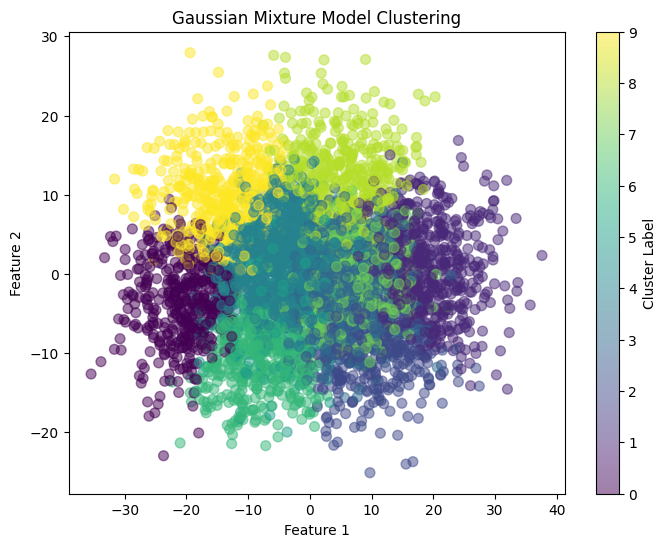

In [28]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels_gaussian, cmap='viridis', s=50, alpha=0.5)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


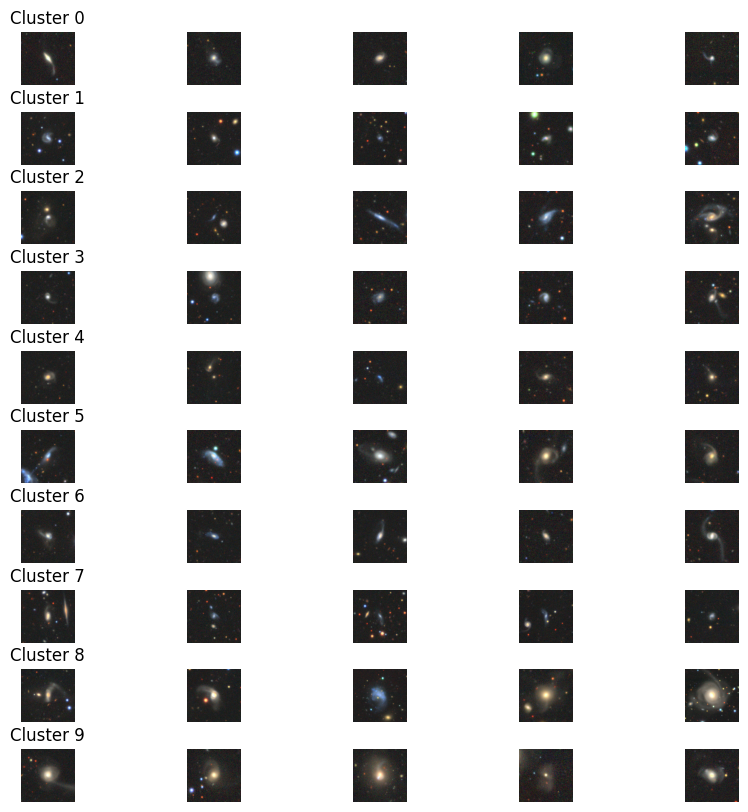

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def display_cluster_images(images, cluster_labels_gaussian, num_clusters, max_images_per_cluster=5):
    # Create a figure with subplots for each cluster
    fig, axes = plt.subplots(num_clusters, max_images_per_cluster, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Initialize counters for each cluster
    cluster_counts = np.zeros(num_clusters, dtype=int)

    # Iterate over each image and its cluster label
    for image, label in zip(images, cluster_labels_gaussian):
        # Check if the maximum number of images per cluster has been reached
        if cluster_counts[label] >= max_images_per_cluster:
            continue

        # Display the image in the corresponding subplot
        ax = axes[label, cluster_counts[label]]
        ax.imshow(image)
        ax.axis('off')

        # Update the counter for the current cluster
        cluster_counts[label] += 1

    # Hide empty subplots
    for i in range(num_clusters):
        for j in range(cluster_counts[i], max_images_per_cluster):
            axes[i, j].axis('off')

    # Set titles for each subplot
    for i in range(num_clusters):
        axes[i, 0].set_title(f'Cluster {i}')

# Assuming 'images' contains the images and 'cluster_labels' contains the predicted cluster assignments
display_cluster_images(images, cluster_labels_gaussian, num_clusters=10)
plt.show()


In [30]:
from sklearn.cluster import AgglomerativeClustering

# Assuming 'x' contains the features after PCA
# 'x' has shape (num_samples, num_features)

# Instantiate Agglomerative Clustering with desired number of clusters
num_clusters = 10  # Specify the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the model to the data
cluster_labels_agglo = agg_clustering.fit_predict(x)

# Now 'cluster_labels' contains the predicted cluster assignments for each data point
# You can use these labels for further analysis or visualization


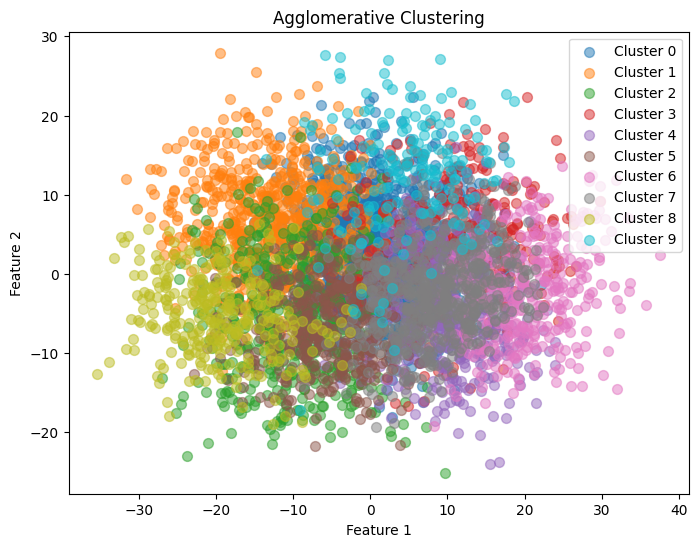

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the clusters
plt.figure(figsize=(8, 6))
unique_labels = np.unique(cluster_labels_agglo)
for label in unique_labels:
    plt.scatter(x[cluster_labels_agglo == label, 0], x[cluster_labels_agglo == label, 1], s=50, alpha=0.5, label=f'Cluster {label}')

plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


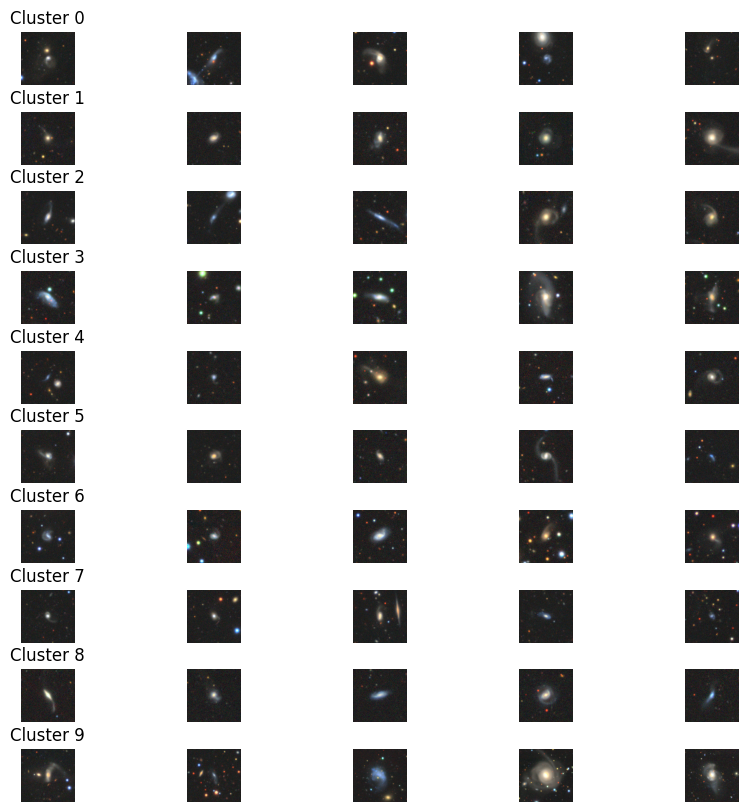

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def display_cluster_images(images, cluster_labels_agglo, num_clusters, max_images_per_cluster=5):
    # Create a figure with subplots for each cluster
    fig, axes = plt.subplots(num_clusters, max_images_per_cluster, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Initialize counters for each cluster
    cluster_counts = np.zeros(num_clusters, dtype=int)

    # Iterate over each image and its cluster label
    for image, label in zip(images, cluster_labels_agglo):
        # Check if the maximum number of images per cluster has been reached
        if cluster_counts[label] >= max_images_per_cluster:
            continue

        # Display the image in the corresponding subplot
        ax = axes[label, cluster_counts[label]]
        ax.imshow(image)
        ax.axis('off')

        # Update the counter for the current cluster
        cluster_counts[label] += 1

    # Hide empty subplots
    for i in range(num_clusters):
        for j in range(cluster_counts[i], max_images_per_cluster):
            axes[i, j].axis('off')

    # Set titles for each subplot
    for i in range(num_clusters):
        axes[i, 0].set_title(f'Cluster {i}')

# Assuming 'images' contains the images and 'cluster_labels' contains the predicted cluster assignments
display_cluster_images(images, cluster_labels_agglo, num_clusters=10)
plt.show()


In [71]:
from sklearn.cluster import DBSCAN

# Assuming 'x' contains the features after PCA
# 'x' has shape (num_samples, num_features)

# Instantiate DBSCAN with desired parameters
eps = 35.0  # specify the maximum distance between two samples to be considered as neighbors
min_samples = 10  # specify the number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data
cluster_labels_db = dbscan.fit_predict(x)

# Now 'cluster_labels' contains the predicted cluster assignments for each data point
# You can use these labels for further analysis or visualization


In [61]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
X_,X_val = train_test_split(x,random_state = 42,test_size = 0.15)
# X_.shape,X_val.shape
max_silhoute = -1e7
best_eps = None
best_min_sample = None
for eps in range(5,50,5):
  for min_samples in tqdm(range(10,100,5)):
    dbscan = DBSCAN(eps=eps,min_samples = min_samples)
    cluster_labels_db = dbscan.fit_predict(X_val)
    sil_score = None
    if len(np.unique(cluster_labels_db)) > 1:
      sil_score = silhouette_score(X_val, cluster_labels_db)
    else:
        sil_score = float('nan')

    if sil_score > max_silhoute:
      max_silhoute = sil_score
      best_eps = eps
      best_min_sample = min_samples

print('Best Sil Score:',max_silhoute,'Best eps:',best_eps,'Best min samples:',best_min_sample)

100%|██████████| 18/18 [00:01<00:00, 10.72it/s]

Best Sil Score: 0.351174 Best eps: 35 Best min samples: 10


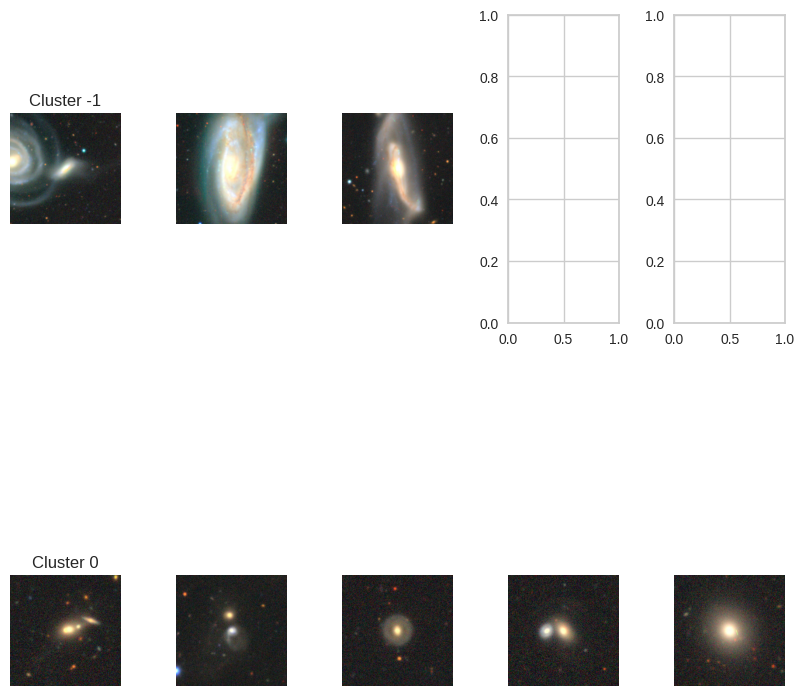

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def display_cluster_images(images, cluster_labels_db):
    # Determine the unique cluster labels
    unique_labels = np.unique(cluster_labels_db)

    # Create a figure with subplots for each cluster
    num_clusters = len(unique_labels)
    max_images_per_cluster = 5
    fig, axes = plt.subplots(num_clusters, max_images_per_cluster, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    # Reshape the axes array to match the number of clusters and maximum images per cluster
    axes = axes.reshape((num_clusters, max_images_per_cluster))

    # Iterate over each cluster label
    for i, label in enumerate(unique_labels):
        # Get indices of images belonging to the current cluster
        cluster_indices = np.where(cluster_labels_db == label)[0]

        # Randomly shuffle the indices
        np.random.shuffle(cluster_indices)

        # Get a subset of indices up to the maximum number of images per cluster
        cluster_indices = cluster_indices[:max_images_per_cluster]

        # Iterate over each image index in the subset
        for j, index in enumerate(cluster_indices):
            # Display the image in the corresponding subplot
            ax = axes[i, j]
            ax.imshow(images[index])
            ax.axis('off')

            # Set title for the first subplot of each cluster
            if j == 0:
                ax.set_title(f'Cluster {label}')

            # Break the loop if the maximum number of subplots per cluster is reached
            if j == max_images_per_cluster - 1:
                break

    # Hide empty subplots
    for i in range(num_clusters):
        for j in range(max_images_per_cluster):
            if j >= len(cluster_indices):
                axes[i, j].axis('off')

# Assuming 'images' contains the images and 'cluster_labels' contains the predicted cluster assignments
display_cluster_images(images, cluster_labels_db)
plt.show()


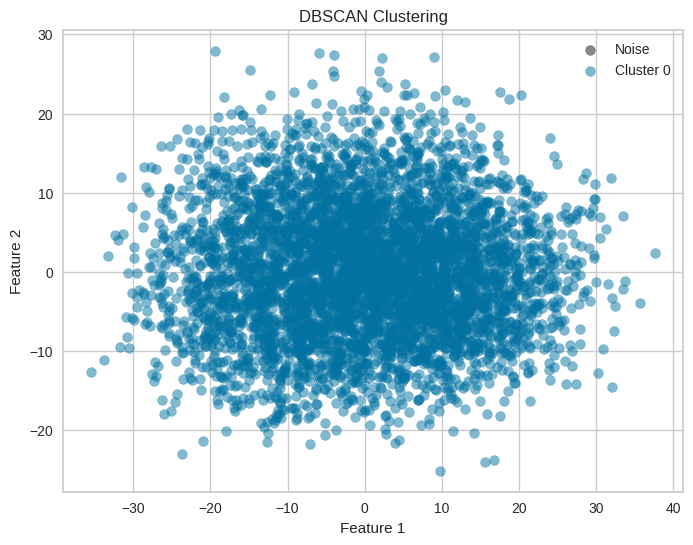

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the clusters
plt.figure(figsize=(8, 6))
unique_labels = np.unique(cluster_labels_db)
for label in unique_labels:
    if label == -1:
        # Noise points are plotted in black
        plt.scatter(x[cluster_labels_db == label, 0], x[cluster_labels_db == label, 1], c='k', s=50, alpha=0.5, label='Noise')
    else:
        # Cluster points are plotted with different colors
        plt.scatter(x[cluster_labels_db == label, 0], x[cluster_labels_db == label, 1], s=50, alpha=0.5, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [67]:
from sklearn.cluster import KMeans

# Instantiate KMeans with desired number of clusters
num_clusters = 10  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=22)

# Fit the KMeans model to the preprocessed features
cluster_labels_kmeans = kmeans.fit_predict(x)

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the counts of samples in each cluster
print("Cluster Counts:")
unique, counts = np.unique(cluster_labels_kmeans, return_counts=True)
print(dict(zip(unique, counts)))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Cluster Centers:
[[ 7.61787033e+00 -5.56743145e+00 -4.91523695e+00  4.93194437e+00
   1.10921872e+00  1.40352035e+00 -6.75046921e-01  5.34588546e-02
   8.31994474e-01  5.09305596e-01  3.06248456e-01  6.68966115e-01
   4.97096702e-02  3.62970561e-01  5.88886619e-01  1.86597808e-05
   2.01378688e-01  3.56576383e-01  6.93676695e-02 -2.94918060e-01
   8.60289708e-02 -6.60272082e-03  1.60281450e-01  3.00931841e-01
   1.04595870e-01  1.82426110e-01 -5.10222316e-02 -2.88671762e-01
  -3.74059647e-01 -4.89385910e-02  8.62244517e-03  1.53307199e-01
  -1.76833391e-01 -2.14918226e-01  1.79721072e-01 -1.58263087e-01
   2.68499218e-02  1.01255395e-01 -2.64698436e-04  3.39198291e-01
  -3.71831417e-01 -2.50787675e-01 -7.27120936e-02 -3.09866411e-03
  -1.28752008e-01  1.49494158e-02 -1.63359627e-01 -3.55493948e-02
  -1.52988076e-01  9.12648067e-02 -1.68519691e-01 -9.21641476e-03
  -1.52321160e-01  4.55241390e-02 -4.19126004e-02  7.17069197e-04
   1.48243129e-01  2.50935912e-01  2.56636322e-01  1.215855

In [68]:
kmeans.labels_

array([3, 0, 1, ..., 3, 7, 5], dtype=int32)

In [48]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [39]:
groups[0]

['/content/drive/MyDrive/Galaxy_images/1.png',
 '/content/drive/MyDrive/Galaxy_images/4.png',
 '/content/drive/MyDrive/Galaxy_images/25.png',
 '/content/drive/MyDrive/Galaxy_images/28.png',
 '/content/drive/MyDrive/Galaxy_images/43.png',
 '/content/drive/MyDrive/Galaxy_images/56.png',
 '/content/drive/MyDrive/Galaxy_images/58.png',
 '/content/drive/MyDrive/Galaxy_images/62.png',
 '/content/drive/MyDrive/Galaxy_images/64.png',
 '/content/drive/MyDrive/Galaxy_images/65.png',
 '/content/drive/MyDrive/Galaxy_images/69.png',
 '/content/drive/MyDrive/Galaxy_images/72.png',
 '/content/drive/MyDrive/Galaxy_images/87.png',
 '/content/drive/MyDrive/Galaxy_images/92.png',
 '/content/drive/MyDrive/Galaxy_images/93.png',
 '/content/drive/MyDrive/Galaxy_images/96.png',
 '/content/drive/MyDrive/Galaxy_images/101.png',
 '/content/drive/MyDrive/Galaxy_images/113.png',
 '/content/drive/MyDrive/Galaxy_images/115.png',
 '/content/drive/MyDrive/Galaxy_images/120.png',
 '/content/drive/MyDrive/Galaxy_images

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Initialize lists to store evaluation scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Gaussian Mixture
if len(np.unique(cluster_labels_gaussian)) > 1:
    silhouette_scores.append(silhouette_score(x, cluster_labels_gaussian))
    davies_bouldin_scores.append(davies_bouldin_score(x, cluster_labels_gaussian))
    calinski_harabasz_scores.append(calinski_harabasz_score(x, cluster_labels_gaussian))
else:
    silhouette_scores.append(float('nan'))
    davies_bouldin_scores.append(float('nan'))
    calinski_harabasz_scores.append(float('nan'))

# Agglomerative Clustering
if len(np.unique(cluster_labels_agglo)) > 1:
    silhouette_scores.append(silhouette_score(x, cluster_labels_agglo))
    davies_bouldin_scores.append(davies_bouldin_score(x, cluster_labels_agglo))
    calinski_harabasz_scores.append(calinski_harabasz_score(x, cluster_labels_agglo))
else:
    silhouette_scores.append(float('nan'))
    davies_bouldin_scores.append(float('nan'))
    calinski_harabasz_scores.append(float('nan'))

# DBSCAN
if len(np.unique(cluster_labels_db)) > 1:
    silhouette_scores.append(silhouette_score(x, cluster_labels_db))
    davies_bouldin_scores.append(davies_bouldin_score(x, cluster_labels_db))
    calinski_harabasz_scores.append(calinski_harabasz_score(x, cluster_labels_db))
else:
    silhouette_scores.append(float('nan'))
    davies_bouldin_scores.append(float('nan'))
    calinski_harabasz_scores.append(float('nan'))

# KMeans
if len(np.unique(cluster_labels_kmeans)) > 1:
    silhouette_scores.append(silhouette_score(x, cluster_labels_kmeans))
    davies_bouldin_scores.append(davies_bouldin_score(x, cluster_labels_kmeans))
    calinski_harabasz_scores.append(calinski_harabasz_score(x, cluster_labels_kmeans))
else:
    silhouette_scores.append(float('nan'))
    davies_bouldin_scores.append(float('nan'))
    calinski_harabasz_scores.append(float('nan'))

# Display the comparison results
print("{:<25} {:<15} {:<15} {:<15}".format("Method", "Silhouette Score", "Davies-Bouldin", "Calinski-Harabasz"))
methods = ["Gaussian Mixture", "Agglomerative Clustering", "DBSCAN", "KMeans"]
for method, sil_score, db_score, ch_score in zip(methods, silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores):
    print("{:<25} {:<15.4f} {:<15.4f} {:<15.4f}".format(method, sil_score, db_score, ch_score))


Method                    Silhouette Score Davies-Bouldin  Calinski-Harabasz
Gaussian Mixture          0.0429          2.7920          262.4996       
Agglomerative Clustering  0.0165          3.2492          208.9131       
DBSCAN                    0.3751          1.4570          7.0722         
KMeans                    0.0467          2.7844          270.6043       


In [75]:
from sklearn.metrics import jaccard_score, adjusted_rand_score

# Compute Jaccard index for pairwise comparisons
jaccard_scores = {}
for i, method1 in enumerate(["Gaussian Mixture", "Agglomerative Clustering", "DBSCAN", "KMeans"]):
    for j, method2 in enumerate(["Gaussian Mixture", "Agglomerative Clustering", "DBSCAN", "KMeans"]):
        if i < j:  # Compute only for unique pairs
            # Compute Jaccard Index
            jaccard_scores[(method1, method2)] = jaccard_score(cluster_labels_list[i], cluster_labels_list[j], average='weighted')

# Compute Adjusted Rand Index
adjusted_rand_scores = {}
for i, method1 in enumerate(["Gaussian Mixture", "Agglomerative Clustering", "DBSCAN", "KMeans"]):
    for j, method2 in enumerate(["Gaussian Mixture", "Agglomerative Clustering", "DBSCAN", "KMeans"]):
        if i < j:  # Compute only for unique pairs
            # Compute Adjusted Rand Index
            adjusted_rand_scores[(method1, method2)] = adjusted_rand_score(cluster_labels_list[i], cluster_labels_list[j])

# Display the comparison results
print("{:<25} {:<25} {:<15} {:<15}".format("Method 1", "Method 2", "Jaccard Index", "Adjusted Rand Index"))
for (method1, method2), jaccard_score_value in jaccard_scores.items():
    adjusted_rand_score_value = adjusted_rand_scores[(method1, method2)]
    print("{:<25} {:<25} {:<15.4f} {:<15.4f}".format(method1, method2, jaccard_score_value, adjusted_rand_score_value))


Method 1                  Method 2                  Jaccard Index   Adjusted Rand Index
Gaussian Mixture          Agglomerative Clustering  0.0423          0.2162         
Gaussian Mixture          DBSCAN                    0.0000          0.0000         
Gaussian Mixture          KMeans                    0.0229          0.5247         
Agglomerative Clustering  DBSCAN                    0.0000          0.0000         
Agglomerative Clustering  KMeans                    0.0264          0.2552         
DBSCAN                    KMeans                    0.0000          0.0000         


Evaluating Gaussian Mixture Clustering:
Silhouette Score: 0.042867012321949005


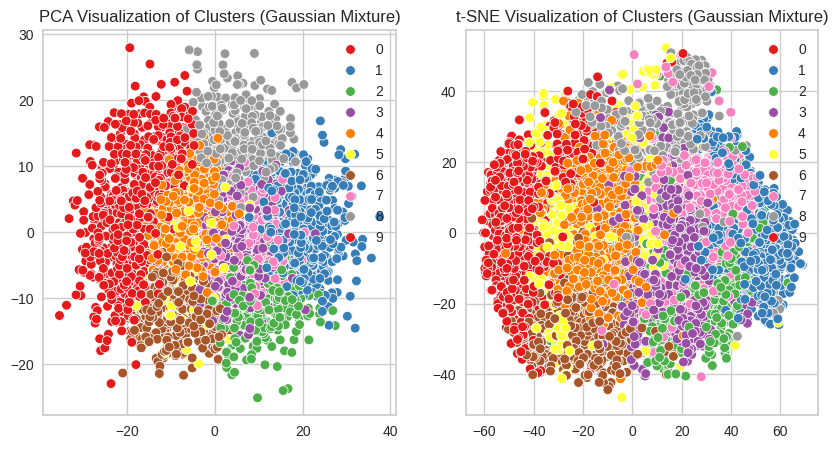

Evaluating Agglomerative Clustering Clustering:
Silhouette Score: 0.016508759930729866


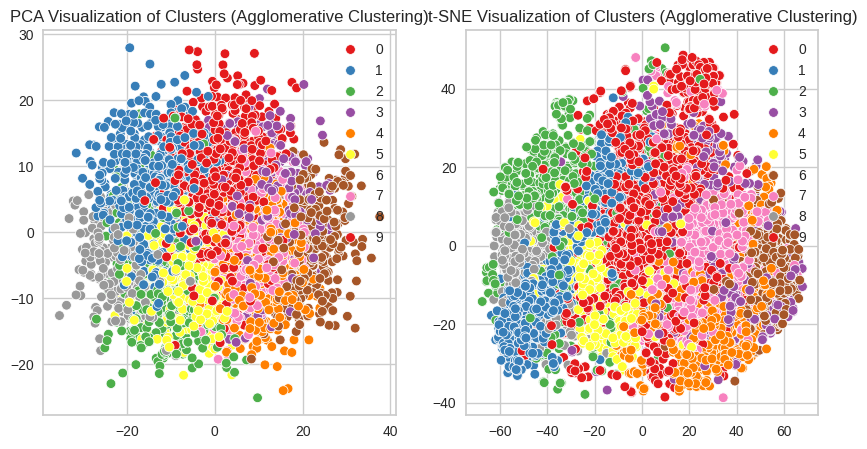

Evaluating DBSCAN Clustering:


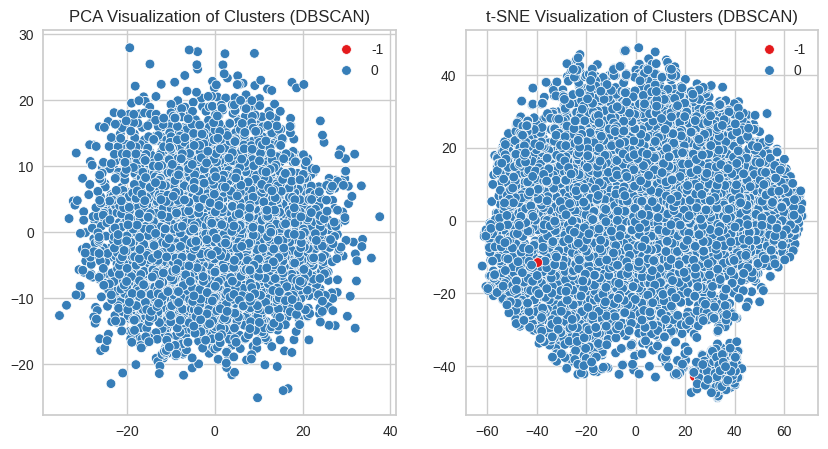

Evaluating KMeans Clustering:
Silhouette Score: 0.046700410544872284


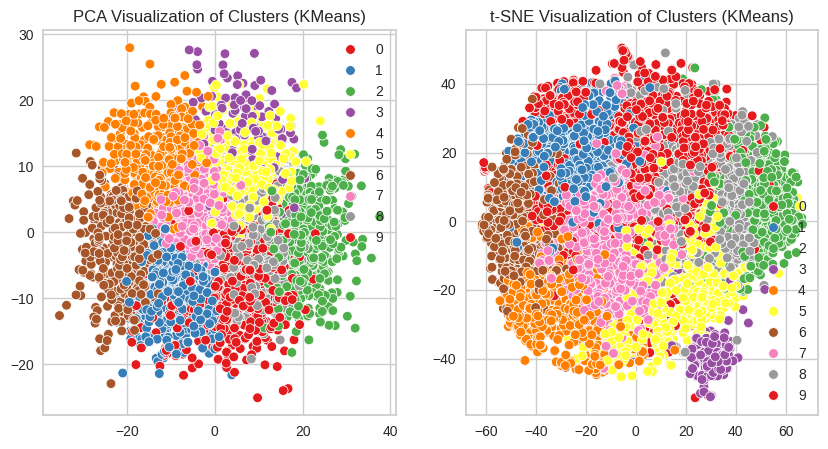

In [76]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

# Visualize clusters using PCA and t-SNE
def visualize_clusters(data, labels, method_name):
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2)

    # PCA visualization
    pca_result = pca.fit_transform(data)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='Set1')
    plt.title(f'PCA Visualization of Clusters ({method_name})')

    # t-SNE visualization
    tsne_result = tsne.fit_transform(data)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette='Set1')
    plt.title(f't-SNE Visualization of Clusters ({method_name})')
    plt.show()

# Evaluate clustering methods
methods = {
    'Gaussian Mixture': cluster_labels_gaussian,
    'Agglomerative Clustering': cluster_labels_agglo,
    'DBSCAN': cluster_labels_db,
    'KMeans': cluster_labels_kmeans
}

for method_name, labels in methods.items():
    print(f"Evaluating {method_name} Clustering:")
    # Compute silhouette score
    if method_name != 'DBSCAN':
        score = silhouette_score(x, labels)
        print(f"Silhouette Score: {score}")

    # Visualize clusters
    visualize_clusters(x, labels, method_name)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

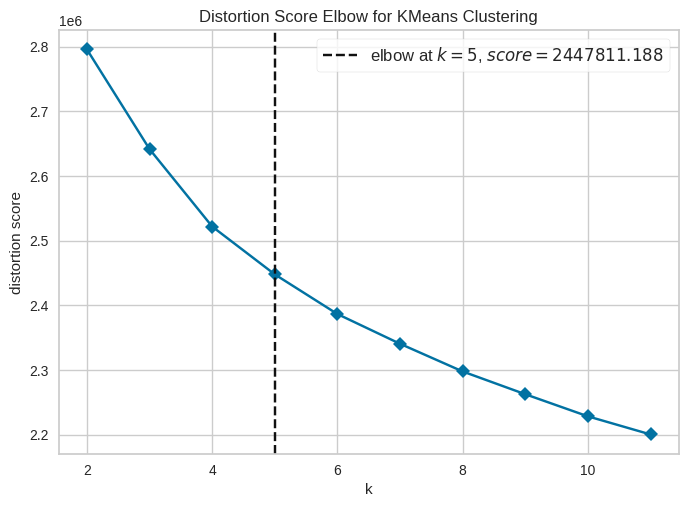

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


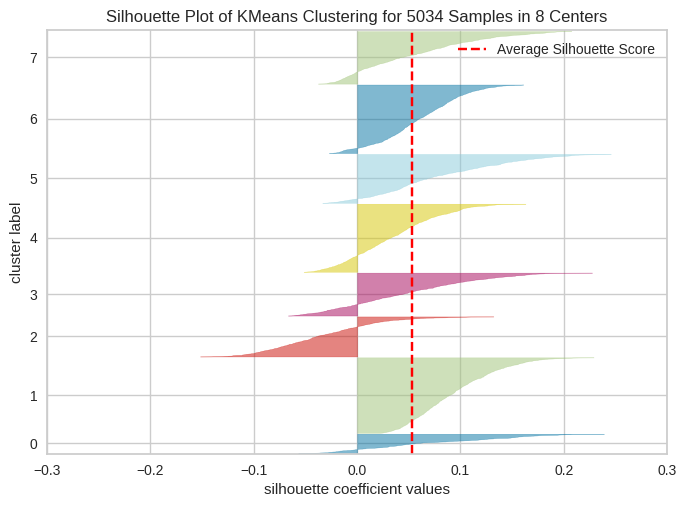

Silhouette Score: 0.046700410544872284
Calinski-Harabasz Index: 270.6043217417069
Davies-Bouldin Index: 2.7844175696871476


In [57]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Elbow Method for KMeans
def elbow_method_kmeans(data):
    visualizer = KElbowVisualizer(KMeans(), k=(2, 12), timings=False)
    visualizer.fit(data)
    visualizer.show()

# Silhouette Analysis for KMeans
def silhouette_analysis_kmeans(data, labels):
    visualizer = SilhouetteVisualizer(KMeans(), colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()

# Other evaluation metrics for KMeans
def evaluate_kmeans(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

# Apply evaluation methods to KMeans
elbow_method_kmeans(x)
silhouette_analysis_kmeans(x, cluster_labels_kmeans)
evaluate_kmeans(x, cluster_labels_kmeans)


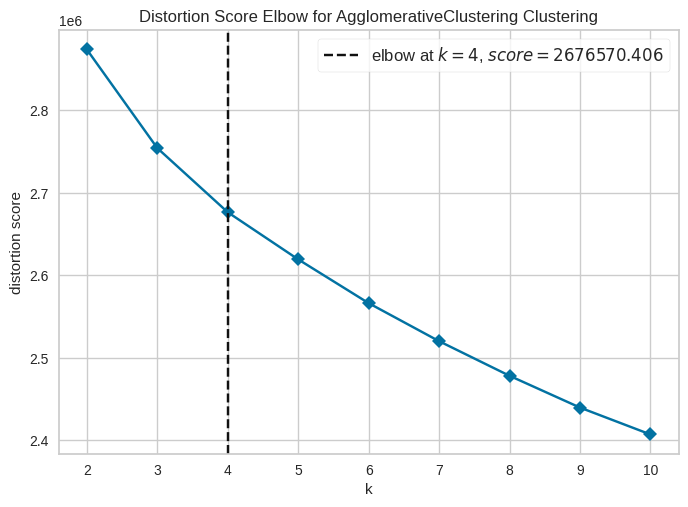

In [96]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Elbow Method for Agglomerative Clustering
def elbow_method_agglo(data):
    visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
    visualizer.fit(data)
    visualizer.show()

# Wrapper function for Agglomerative Clustering
def fit_predict_agglo(data):
    model = AgglomerativeClustering()
    labels = model.fit_predict(data)
    return labels, model

# Apply evaluation methods to Agglomerative Clustering
elbow_method_agglo(x)

